# IST256 Project Deliverable 2 (P2)

## Phase 2: Data Exploration

In this step you should begin to explore your dataset in order to figure out what type of data story you want to tell with it. There is no "magic recipe" to follow here, you're going to need to understand your data and explore it to find something interesting. 

Throughout your exploration, you might decide that you need to enhance your dataset using an API or some other dataset. Doing this will raise the complexity of your project and ultimately improve the possible maximum grade. Your small group instructor can help you with ideas to enhance your dataset, but you're going to need to ask specific questions. The only way you can do that is to understand your data first.

### The Process

Getting to know your data takes time and research. We want you to use Python code to explore your data. Load it into a dataframe and explore and plot it. There is an expectation that you will explain what the code tells you about your data. **One more time, with feeling:** Not what the code DOES but what it tells you about your data. 

**Example**

    #CODE
    passengers['Survived'].value_counts()
    
    #OUTPUT
    Survived
    0    549
    1    342
    Name: count, dtype: int64

    # TELLS ME
    More people died than survivied
    
    
Use the common approaches we learned the after unit 10 to explore your data:

    - get `info()` on your columns: time? categorical? numerical measure? text? geographic? the Pandas / Vis readings will help here.
    - `descrivbe()` your numerical data to get a sense of the distributions
    - use `value_counts()` to get a sense of the categorical data items
    - plot the numercial data against the time, categorical data to see patters
    - plot the numberical data against each other to see a comparision
    - use histograms to get a sense of how numerical data is distributed.
    
**Advice**

This is not a one-size fits all endeavor. Again, there is no magic recipe to follow here, only good, old-fashioned exploration of your dataset of interest. For each snipped of code you write, be sure to explain what it tells you about your data, or what you learned about it. Please note not every code exploration is going to yield a compelling story, just like prospectors don't find gold or strike oil every time. Sometimes what you didn't find is just as important.

As you explore, think of what needs to happen to make your data analysis more useful or compeling. That's how you figure out ways to create a better story. For example reviews of Temu products might not be interesting, but "what they are saying" (sentiment) and "what they are saying it about" (named entities) might be. This gives you ideas for enhancing your data set! You will need these for part 2.2.
    

### 2.1 Load your dataset(s) into dataframes.

In this section load your datasets into dataframes and then `concat()` or `merge()` them into a single dataset.

Some of you might have done this already for P1.


In [1]:
# 2.1 Code here
!pip install cartopy
import pandas as pd
import numpy as np
import seaborn as sns
import folium
import math
import warnings
import matplotlib.pyplot as plt
import cartopy.crs as ccrs #learned through chatGPT
warnings.filterwarnings('ignore')

%matplotlib inline

airportdf = pd.read_csv("airports.csv")
netflixdf = pd.read_csv("n_movies.csv")


### 2.2 Data Explorations

Explore your data. Start with the basics and work your way to smaller, curated datasets and plots, as outlined in the example above.

For each code included here, make sure to write up what the code tells you about your data / what you learned about your data from the output.

You can place this in a markdown cell under your code cell where it says: *Tells me:*

Feel free to add more cells as needed.

In [2]:
# CODE 
airportdf['state'].value_counts()

state
AK    266
TX    209
CA    205
OK    102
FL    100
OH    100
GA     97
NY     97
MI     94
MN     89
IL     88
WI     84
KS     78
IA     78
MO     74
AR     74
AL     73
NE     73
NC     72
MS     72
MT     71
PA     71
TN     70
IN     65
WA     65
AZ     59
OR     57
SD     57
LA     55
ND     52
SC     52
NM     51
KY     50
CO     49
VA     47
ID     37
UT     35
NJ     35
ME     34
NV     32
WY     32
MA     30
WV     24
MD     18
HI     16
CT     15
NH     14
VT     13
PR     11
RI      6
DE      5
VI      5
CQ      4
AS      3
DC      1
GU      1
Name: count, dtype: int64

Tells me:
There are a lot of airports in the larger states. This dataset also counts US territories as US states.

In [3]:
netflixdf['genre'].value_counts()

genre
Comedy                             859
Drama                              587
Animation, Action, Adventure       553
Documentary                        518
Comedy, Drama                      284
                                  ... 
Animation, Action, History           1
Drama, Romance, Western              1
Documentary, Adventure, History      1
Drama, Horror, Romance               1
News, Reality-TV                     1
Name: count, Length: 569, dtype: int64

Tells me: The most popular genre within this dataset is comedy. I will also need to clean up this column as there are many values with multiple genres in them.

In [4]:
# CODE 
airportdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3379 entries, 0 to 3378
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   iata     3379 non-null   object 
 1   airport  3379 non-null   object 
 2   city     3367 non-null   object 
 3   state    3367 non-null   object 
 4   country  3379 non-null   object 
 5   lat      3379 non-null   float64
 6   long     3379 non-null   float64
dtypes: float64(2), object(5)
memory usage: 184.9+ KB


Tells me: This tells me that only the latitude and longitude columns are floats and all the other columns are objects and not numbers based. I can only perform numerical analytics on the longitude and latitude columns.

In [5]:
# CODE 
netflixdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9957 entries, 0 to 9956
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9957 non-null   object 
 1   year         9430 non-null   object 
 2   certificate  6504 non-null   object 
 3   duration     7921 non-null   object 
 4   genre        9884 non-null   object 
 5   rating       8784 non-null   float64
 6   description  9957 non-null   object 
 7   stars        9957 non-null   object 
 8   votes        8784 non-null   object 
dtypes: float64(1), object(8)
memory usage: 700.2+ KB


Tells me: This tells me that the netflix dataframe only has one float type column, and that is the rating column. This means that all other columns are not number based. this means that I need to change the duration column into integers within my project.

<Axes: xlabel='rating', ylabel='count'>

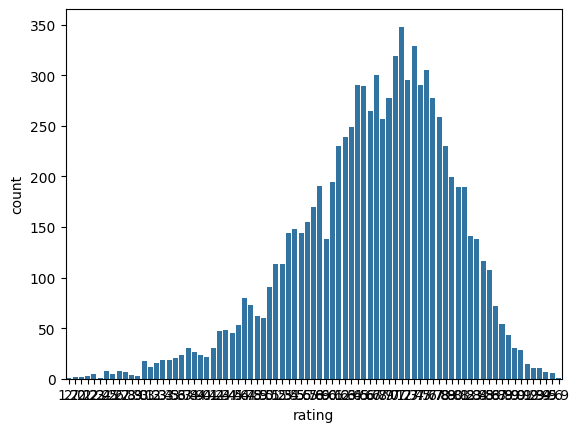

In [6]:
# CODE 
netflixdf['count']=1
sns.barplot(data=netflixdf, x="rating", y='count', estimator="sum")

Tells me:
The barplot is skewed right. That means there are more ratings closer to 10 than closer to 0. However, there are very few that are rated around 10. Most movies and shows are rated around 7.

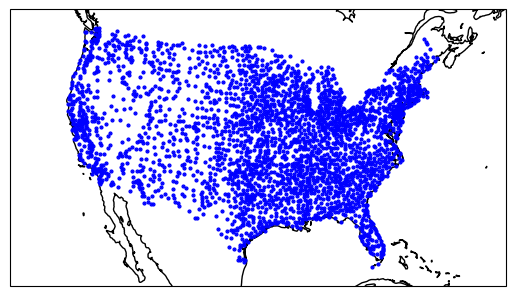

In [7]:
# learned cartopy for this, used some AI for help
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.AlbersEqualArea(central_longitude=-96, central_latitude=38)})
ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())
ax.coastlines()
ax.plot(airportdf['long'], airportdf['lat'], marker='o', markersize=1, markeredgewidth=2, color='b', linestyle='None', transform=ccrs.PlateCarree())

Tells me:
In the continental US, the airports are closer to the coasts and the midwest. There are not as many airports in the mountain regions closer to the pacific coast.

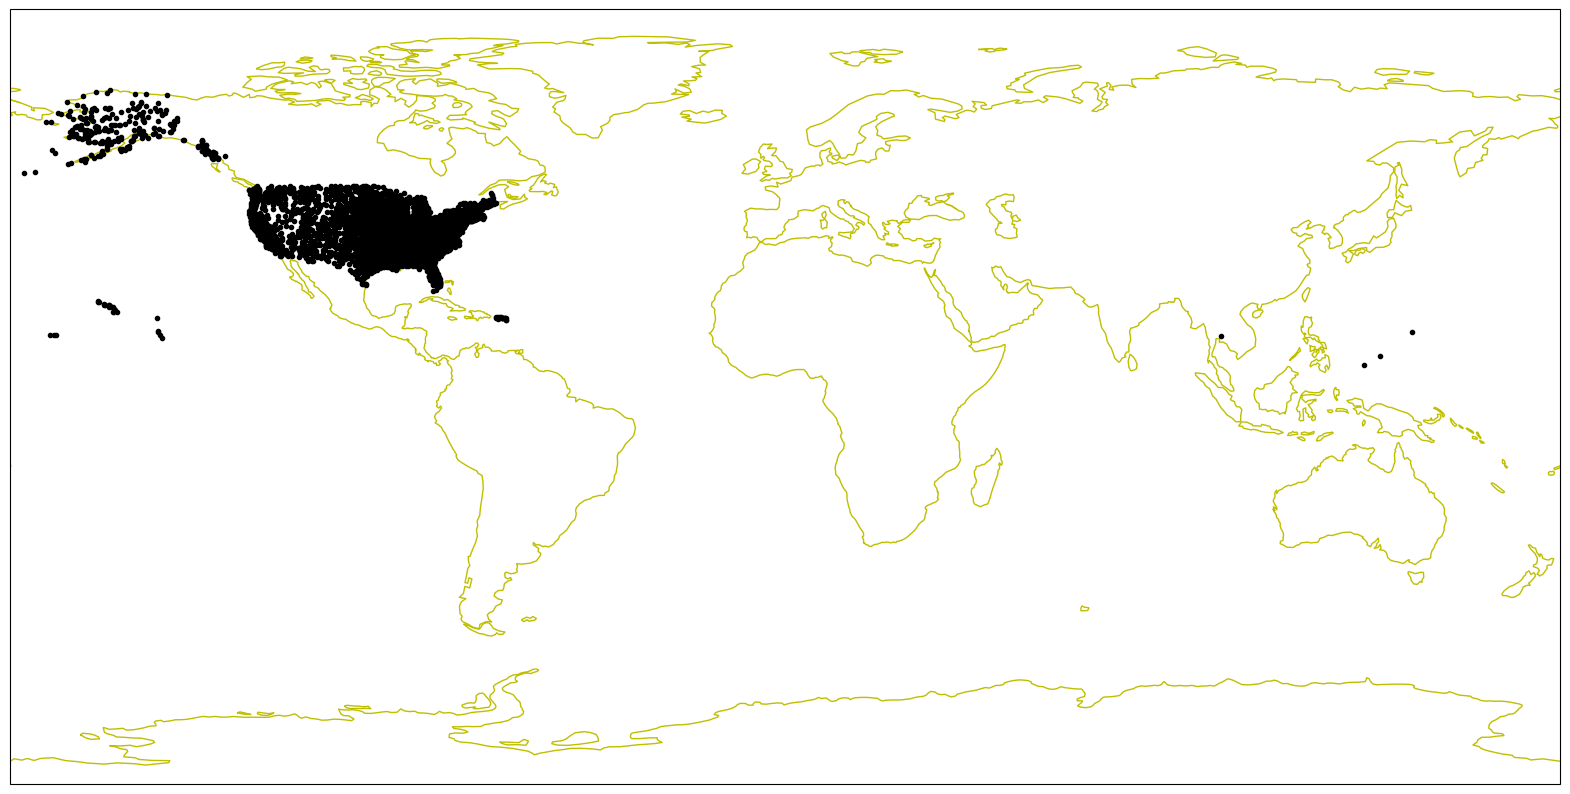

In [8]:
# learned cartopy for this, used some AI for help
fig, ax = plt.subplots(figsize=(20, 16),subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines(color='y')
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
ax.plot(airportdf['long'], airportdf['lat'], marker='o', markersize=3, markeredgewidth=1, color='black', linestyle='None', transform=ccrs.PlateCarree())

Tells me: This tells me that although it is a USA dataset, there are many airports within the dataset that are outside of the continental US (and in US territories).

In [9]:
unique_words = set()

for genre in netflixdf['genre']:
    if isinstance(genre, str): #https://www.w3schools.com/python/ref_func_isinstance.asp
        unique_words.update(genre.replace(",", "").split())

for word in sorted(unique_words):
    print(word)

Action
Adventure
Animation
Biography
Comedy
Crime
Documentary
Drama
Family
Fantasy
Film-Noir
Game-Show
History
Horror
Music
Musical
Mystery
News
Reality-TV
Romance
Sci-Fi
Short
Sport
Talk-Show
Thriller
War
Western


Tells me: This tells me all the unique genres that are within the dataset. 


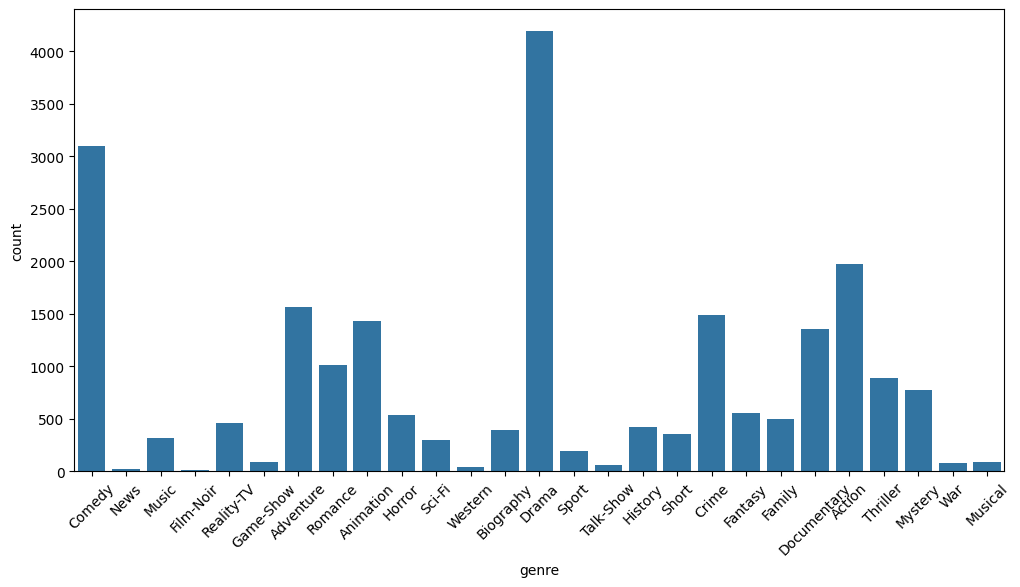

In [10]:
# CODE
unique_words = list(unique_words)
word_counts = [netflixdf['genre'].str.contains(word).sum() for word in unique_words] #learned from ChatGPT
wordcountsdf = pd.DataFrame({'genre': unique_words, 'count': word_counts})
plt.figure(figsize=(12, 6)) 
sns.barplot(data=wordcountsdf, x='genre', y='count')
plt.xticks(rotation=45)
plt.show()

Tells me: Although Comedy was the most common genre when we looked before, Drama shows up more frequently within the dataset when we search for what each row contains!

In [11]:
word_mean_duration = {}

for word in unique_words:
    mask_genre = netflixdf['genre'].fillna('').str.contains(word)
    durations = netflixdf.loc[mask_genre, 'duration']
    durations = durations.str.replace(' min', '').astype(float)
    mean_duration = durations.mean()
    word_mean_duration[word] = mean_duration

for word, mean_duration in word_mean_duration.items():
    print(f"word: {word}, mean duration: {mean_duration}")

word: Comedy, mean duration: 67.45640432098766
word: News, mean duration: 92.58823529411765
word: Music, mean duration: 84.28099173553719
word: Film-Noir, mean duration: 91.08333333333333
word: Reality-TV, mean duration: 49.017921146953405
word: Game-Show, mean duration: 53.61538461538461
word: Adventure, mean duration: 57.22292490118577
word: Romance, mean duration: 80.04523227383864
word: Animation, mean duration: 36.41394148020654
word: Horror, mean duration: 88.25910064239828
word: Sci-Fi, mean duration: 75.37551020408164
word: Western, mean duration: 102.58064516129032
word: Biography, mean duration: 106.13981762917933
word: Drama, mean duration: 81.09400974491258
word: Sport, mean duration: 82.76712328767124
word: Talk-Show, mean duration: 39.18181818181818
word: History, mean duration: 97.07301587301588
word: Short, mean duration: 20.7003367003367
word: Crime, mean duration: 87.72196261682242
word: Fantasy, mean duration: 67.9685393258427
word: Family, mean duration: 59.77866666

Tells me: This tells me the average duration of every movie in the netflix dataset. I can use these durations to see which movies will more likely show up for longer flight durations!

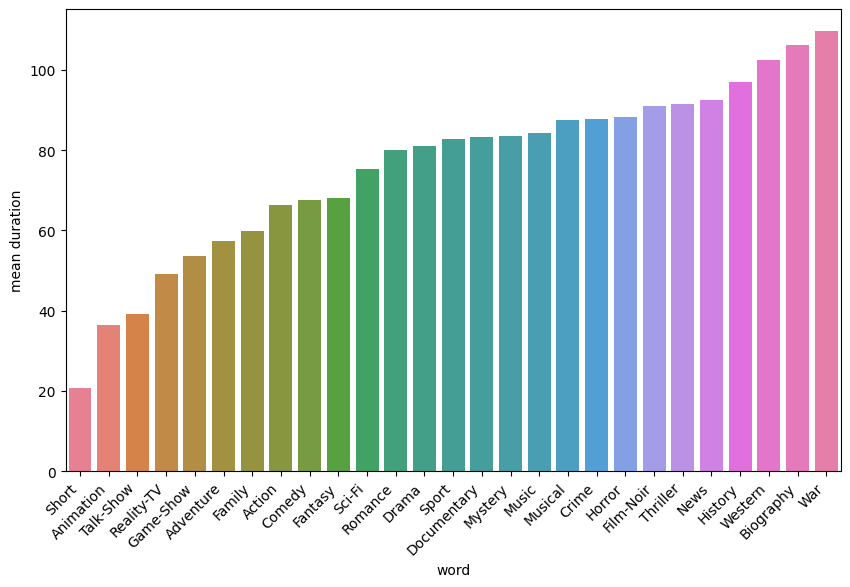

In [12]:
word_mean_duration_df = pd.DataFrame(word_mean_duration.items(), columns=['word', 'mean duration'])
word_mean_duration_df = word_mean_duration_df.sort_values(by='mean duration')

plt.figure(figsize=(10, 6))
sns.barplot(data=word_mean_duration_df, x='word', y='mean duration', hue='word')
plt.xticks(rotation=45, ha='right')
plt.show()

Tells me: This is a visualization of the connection between genres (when filtered) and movie duration. I can predict which movies will appear when for longer flight durations based on this. I can also see that (obviously) the TV shows have shorter durations.

In [13]:
netflixdf['duration'] = netflixdf['duration'].str.replace(' min', '').astype(float)

netflixdf['rounded_rating'] = netflixdf['rating'].round()

mean_durations_by_rating = netflixdf.groupby('rounded_rating')['duration'].mean() #help from ChatGPT

print(mean_durations_by_rating)


rounded_rating
2.0     74.590909
3.0     85.700000
4.0     85.048701
5.0     84.831099
6.0     83.408287
7.0     74.401074
8.0     62.972376
9.0     57.182432
10.0    41.928571
Name: duration, dtype: float64


Tells me: This tells me the mean durations for each rating. I can see that people do not like movies that are too long as the duration tends to decrease after the 4.0 rating.


<Axes: xlabel='rating', ylabel='mean duration'>

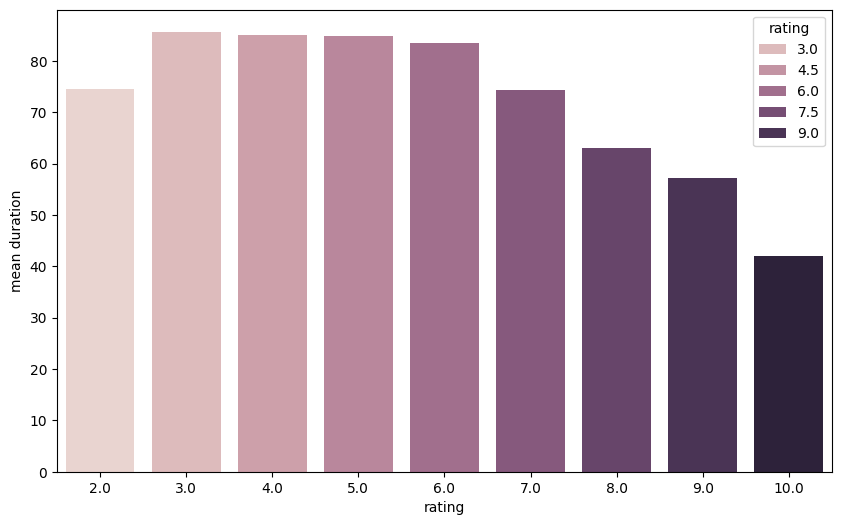

In [14]:
# CODE 
rating_mean_duration_df = pd.DataFrame(mean_durations_by_rating.items(), columns=['rating', 'mean duration'])

plt.figure(figsize=(10, 6))
sns.barplot(data=rating_mean_duration_df, x='rating', y='mean duration', hue='rating')

Tells me: This is a visualization of my previously analyzed realtionship between rating and duration. People do not like movies and shows that are too long as the duration dips as the rating increases. However, this might be skewed as a lot of the data in this dataset is tv shows.


In [15]:
unique_stars = set()

for row in netflixdf['stars']:
    if isinstance(row, str): #https://www.w3schools.com/python/ref_func_isinstance.asp
        unique_stars.update(row.replace('"',"").replace("[","").replace("]","").replace("'","").replace("Star:","").replace("Stars:","").split(','))

unique_stars_df = pd.DataFrame(sorted(unique_stars))
unique_stars_df = unique_stars_df.drop(unique_stars_df.index[:3])

unique_stars_df

,0
3,$avannah Hannah
4,2Mex
5,50 Cent
6,88 Keys
7,A Boogie wit da Hoodie
...,...
25668,Ömer Ugur
25669,Öner Erkan
25670,Öykü Karayel
25671,Özcan Alper


Tells me: This tells me all the stars in all of the movies and TV shows within the dataset.

In [16]:
netflixdf['TV'] = netflixdf['certificate'].fillna('').apply(lambda x: 'yes' if 'TV' in x else 'no')
netflixdf['TV']

0       yes
1       yes
2       yes
3       yes
4       yes
       ... 
9952    yes
9953    yes
9954    yes
9955    yes
9956    yes
Name: TV, Length: 9957, dtype: object

Tells me: By engineering this column, I can easily tell which rows in the dataset are TV shows or movies.

<Axes: xlabel='TV', ylabel='count'>

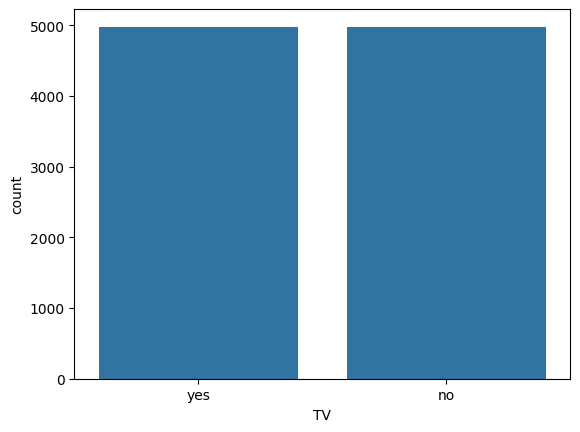

In [17]:
netflixdf['count']=1
sns.barplot(data=netflixdf, x='TV', y='count', estimator='sum')

Tells me: This tells me that the amount of TV shows and the amount of movies are approximately the same.

<Axes: xlabel='TV', ylabel='duration'>

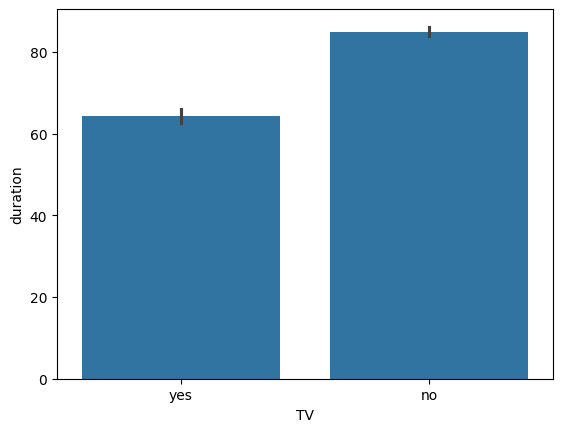

In [18]:
netflixdf['count'] = 1
#netflixdf['duration'] = netflixdf['duration'].str.replace(' min', '').astype(float)
sns.barplot(data=netflixdf, x='TV', y='duration', estimator=np.mean, orient='v')

Tells me: This tells me that, as you would suspect, the TV show episodes are shorter than the movies. However, I did think that the TV shows were going to be shorter than they actually are!

### 2.3 Prepare for your Data Story

In this last step, you will prepare for the actual data story.

#### 2.3.1 Your Data Story

Based on your explorations, what is the story you plan to tell with this data and why? Make sure to justify your story based on your discoveries in 2.2. Why is it a compelling and interesting story?


My data story will be based on predicting what kinds of movies will show up based on the duration of one's flight. Prior to someone using my tool to determine what movies or tv shows will entertain them for the entirety of their flight, I will take them through the relationships between aspects of a netflix movie or tv show (rating, stars, genre, year, etc.) and the duration of that movie or show. Through my data exploration, I learned that there were some interesting relationships to be examined between things like the genre of a movie or tv show and the average duration of that same film. For example, war films had the longest average duration. Therefore, on a very long flight, I would suspect a war film to be presented to the user of my tool!

#### 2.3.2 Enhancements

Based on your data story, come up with 1 to 3 ways your data can be enhanced to provide a better story. You might not use any of these enhancements in P3, but its useful to consider them if you are seeking a higher grade on the project and need more complexity.


1. I will engineer a column to easily determine if the movie in that row is a movie or a tv show. I can do this by using information from the certificate column.
2. I will make sure that I can easily find duration means by making the duration column into only floats.
3. I will make sure to make unique words lists/ sets for the genre and stars column so its easier to see which genres are stars lead to longer duration.

### No Grading at This Point, Only feedback

Remember you will not recieve a grade for P2, only feedback. 

**Specific Feedback Provided:**

- Whether or not you completed this milestone to statisfaction.
- Approximate level of complexity of your project A, B or C. (Consult Syllabus)
- Suggestions / comments on next steps, including what can be done it enhance complexity.

**Things that may affect your grade:** 

- Late or unsatisfactory / inadequate submissions will affect your grade. 
- P3 projects that do not align with your P2 will affect your grade. 
- Consult the syllabus for details.

When you are ready, turn in your P2 using the submission script.

In [ ]:
# run this code to turn in your work!
from casstools.assignment import Assignment
Assignment().submit()

✅ TIMESTAMP  : 2024-04-18 21:35
✅ COURSE     : ist256
✅ TERM       : spring2024
✅ USER       : ahschiff@syr.edu
✅ STUDENT    : True
✅ PATH       : ist256/spring2024/lessons/project/P2.ipynb
✅ ASSIGNMENT : P2.ipynb
✅ POINTS     : 0
✅ DUE DATE   : 2024-04-29 23:59
✅ LATE       : False
✅ STATUS     : New Submission



❓ Submit? [y/n] ❓  y
